<a href="https://colab.research.google.com/github/NoteAP00/basic-machine-learning-using-scikit-learn/blob/master/005-Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression  
supervised learning: simple linear regression

<ipython-input-7-d50d987be36f>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


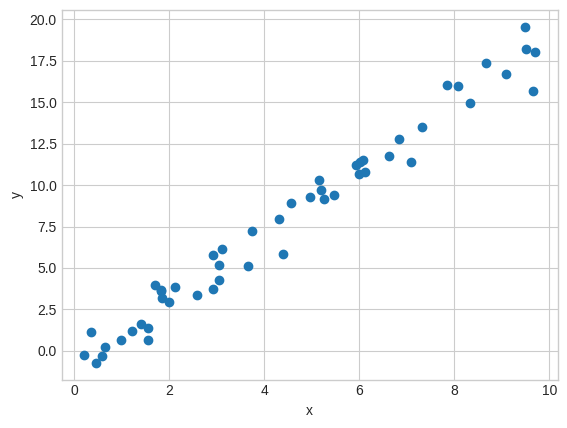

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

# create random data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## choose a class of model

In [8]:
from sklearn.linear_model import LinearRegression

## choose model hyperparameters

In [9]:
model = LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


## arrange data into a features matrix and target vector

In [10]:
X = x[:, np.newaxis]
print(X.shape)

(50, 1)


In [11]:
print(X[:10])

[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]]


## fit the model to your data

In [12]:
model.fit(X,y)

LinearRegression()

In [13]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

## hyperparameters

These two parameters represent the __slope__ and __intercept__ of the simple linear fit to the data

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311146

## predit labels for unknown data

In [16]:
xfit = np.linspace(-1, 11)

# Xfit = unknown data
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [17]:
print(Xfit.shape)
print(Xfit[:10])

(50, 1)
[[-1.        ]
 [-0.75510204]
 [-0.51020408]
 [-0.26530612]
 [-0.02040816]
 [ 0.2244898 ]
 [ 0.46938776]
 [ 0.71428571]
 [ 0.95918367]
 [ 1.20408163]]


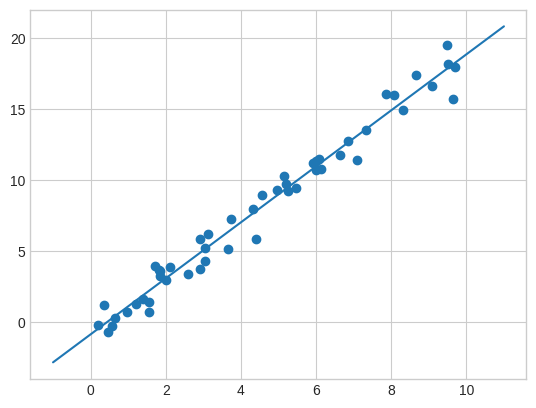

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In class **added**

In [46]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [39]:
model.score(X,y)

0.9749140085676858

In [42]:
y_fit = model.predict(X)

In [43]:
r2_score(y,y_fit)

0.9749140085676858

In [44]:
mean_squared_error(y,y_fit)

0.8230711437486881

In [47]:
mean_absolute_error(y,y_fit)

0.7306407201834607

## Example: Diabetes dataset

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [21]:
print("shape of the dataset", diabetes.data.shape)

shape of the dataset (442, 10)


In [22]:
diabetes.data[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485]])

In [23]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]  # coloumn 2

In [24]:
diabetes_X[:10]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215]])

In [25]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [26]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [27]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [28]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

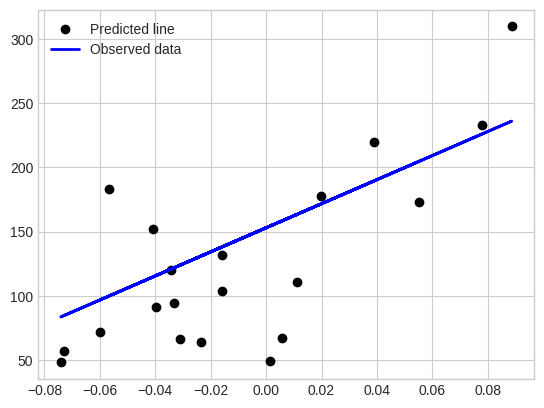

In [29]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)
plt.legend(['Predicted line', 'Observed data'])

#plt.xticks(())
#plt.yticks(())

plt.show()

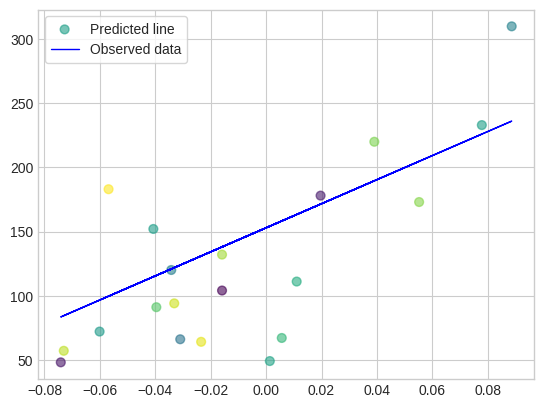

In [30]:
rng = np.random.RandomState(0)
colors = rng.rand(20)

fig = plt.figure()
plt.scatter(diabetes_X_test, diabetes_y_test,  c=colors, s=40, alpha=0.6, cmap='viridis')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=1)
plt.legend(['Predicted line', 'Observed data'], frameon=True, loc='upper left')

plt.show()

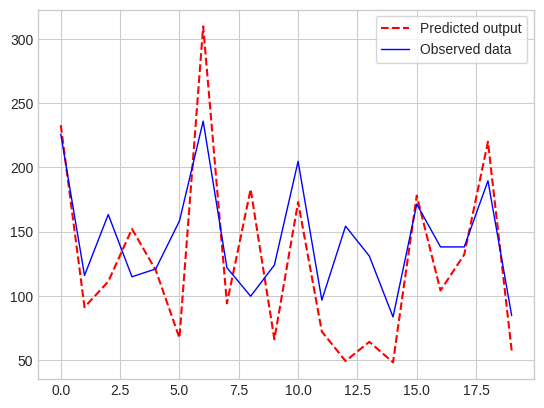

In [31]:
plt.plot(diabetes_y_test, '--r')
plt.plot(diabetes_y_pred, '-b', linewidth=1)
plt.legend(['Predicted output', 'Observed data'], frameon=True, loc='upper right')

plt.show()

In [32]:
diabetes_y_test[0:10]

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66.])

In [33]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47
